# A simple analysis using the plot-likert module

In [2]:
from IPython.display import display, Markdown, Latex # Print markdown in jupyter
import os
import pandas as pd # Dataframes
import plot_likert # Likert scale analysis

### 1. Import dataset

In [3]:
datadir = 'data/' # add this directory in your system and store your csv data there.
table = 'scores_T.csv' # the name of my dataset. Change it to fit yours.

# Read data into a pandas dataframe
df = pd.read_csv(os.path.join(datadir, table), sep= '\t') # my data is actually a tab-separated table

if not df.empty:
    display(Markdown(f"""_Your file `{table}` is loaded_"""))
    # Look at the description of your dataset
    df.info()
else:
    print(f"""Your dataset was not loaded""")

_Your file `scores_T.csv` is loaded_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Participant  430 non-null    object
 1   Question     430 non-null    object
 2   Response     430 non-null    object
 3   Number       430 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 13.6+ KB


#### Get some key descriptions of the dataset

In [4]:
# Get length of the dataset
df_len = len(df['Participant'])
# Get number of unique questions
questions_n = len(df['Question'].unique())
# Get number of unique participants
participants_n = len(df['Participant'].unique())
# Compensate for the difference between zero indexing and early stop in range function later
zero_range_diff = 2
range_top = df_len + zero_range_diff - participants_n

display(Markdown(f"""_Your dataset contains {questions_n} responses for each of the {participants_n} participants in my data.
Responses are stacked on top of each other so a new participant is shown every {questions_n} rows.
Here are all the columns and the top {questions_n * 2 + 1} rows_"""))
df.head(questions_n * 2 + 1)

_Your dataset contains 10 responses for each of the 43 participants in my data.
Responses are stacked on top of each other so a new participant is shown every 10 rows.
Here are all the columns and the top 21 rows_

,Participant,Question,Response,Number
0,P1,Q1,A,3
1,P1,Q2,A,3
2,P1,Q3,A,3
3,P1,Q4,A,3
4,P1,Q5,D,2
5,P1,Q6,D,2
6,P1,Q7,A,3
7,P1,Q8,SA,4
8,P1,Q9,SA,4
9,P1,Q10,A,3


### 2. Wrangle dataset
The data must be in an `ID  Question1  Question2  QuestionN` format, so we must make it fit.

In [5]:
# There are no missing (NaN) values are contained in this dataset

# Get likert scores responses in a list of list with all 29 participants and 11 responses each
scores = [df.iloc[x:x+questions_n].Response.tolist() for x in range(0, range_top, questions_n)]

# The responses must be turned into a format that fits the scale in plot_likert (see https://github.com/nmalkin/plot-likert/blob/master/plot_likert/scales.py)
# In this case, the  responses have been abbreviated as "SA, A, N" etc. We will map the responses to a standard format.
scores4_0_dict = {
'SA': '4 - Strongly Agree',  
'A': '3 - Agree',
'D': '2 - Disagree',
'SD': '1 - Strongly Disagree',
'NO RESPONSE': '0 - No Response'
}
scores = [[scores4_0_dict[x] for x in subl] for subl in scores]

In [6]:
# Create dataframe with the scores, then add the participant IDs
question_texts = [
"1. The language used in the textbook is the same as the language my friends/family use.",
"2. There are examples from my culture in the textbook.",
"3. The textbook positively portrays the type of Spanish that I'm used to hearing and/or using.",
"4. According to the textbook, the type of Spanish spoken in the US is good Spanish.",
"5. The textbook says that some Spanish is correct and some isn't.",
"6. The textbook says that there is only one correct way to write Spanish.",
"7. The textbook talks about my culture in a positive way.",
"8. I can relate to the language used in the textbook.",
"9. I can relate to the topics covered in my textbook.",
"10. The textbook talks about many different varieties of Spanish.",
]
# df2 = pd.DataFrame(scores, columns = ['Q{}'.format(i) for i in range(1,12)])
df2 = pd.DataFrame(scores, columns = [i for i in question_texts])
# Look at the top 5 rows
df2.head(5)

,1. The language used in the textbook is the same as the language my friends/family use.,2. There are examples from my culture in the textbook.,3. The textbook positively portrays the type of Spanish that I'm used to hearing and/or using.,"4. According to the textbook, the type of Spanish spoken in the US is good Spanish.",5. The textbook says that some Spanish is correct and some isn't.,6. The textbook says that there is only one correct way to write Spanish.,7. The textbook talks about my culture in a positive way.,8. I can relate to the language used in the textbook.,9. I can relate to the topics covered in my textbook.,10. The textbook talks about many different varieties of Spanish.
0,3 - Agree,3 - Agree,3 - Agree,3 - Agree,2 - Disagree,2 - Disagree,3 - Agree,4 - Strongly Agree,4 - Strongly Agree,3 - Agree
1,4 - Strongly Agree,4 - Strongly Agree,4 - Strongly Agree,4 - Strongly Agree,1 - Strongly Disagree,1 - Strongly Disagree,4 - Strongly Agree,4 - Strongly Agree,3 - Agree,3 - Agree
2,4 - Strongly Agree,4 - Strongly Agree,4 - Strongly Agree,3 - Agree,3 - Agree,3 - Agree,3 - Agree,3 - Agree,3 - Agree,3 - Agree
3,3 - Agree,3 - Agree,3 - Agree,3 - Agree,2 - Disagree,0 - No Response,3 - Agree,3 - Agree,3 - Agree,3 - Agree
4,3 - Agree,3 - Agree,2 - Disagree,3 - Agree,3 - Agree,3 - Agree,3 - Agree,3 - Agree,2 - Disagree,3 - Agree


### 3. Analysis

##### 3.1 Raw counts

In [7]:
counts = plot_likert.likert_counts(df2, plot_likert.scales.scores4_0_custom)
counts

,0 - No Response,1 - Strongly Disagree,2 - Disagree,3 - Agree,4 - Strongly Agree
1. The language used in the\ntextbook is the same as the\nlanguage my friends/family\nuse.,0.0,1.0,5.0,24.0,9.0
2. There are examples from my\nculture in the textbook.,0.0,0.0,1.0,31.0,7.0
3. The textbook positively\nportrays the type of Spanish\nthat I'm used to hearing\nand/or using.,0.0,0.0,5.0,22.0,12.0
"4. According to the textbook,\nthe type of Spanish spoken in\nthe US is good Spanish.",0.0,1.0,9.0,20.0,9.0
5. The textbook says that some\nSpanish is correct and some\nisn't.,0.0,16.0,17.0,5.0,1.0
6. The textbook says that\nthere is only one correct way\nto write Spanish.,1.0,16.0,15.0,6.0,1.0
7. The textbook talks about my\nculture in a positive way.,0.0,0.0,0.0,27.0,12.0
8. I can relate to the\nlanguage used in the textbook.,1.0,0.0,2.0,27.0,9.0
9. I can relate to the topics\ncovered in my textbook.,0.0,0.0,3.0,30.0,6.0
10. The textbook talks about\nmany different varieties of\nSpanish.,0.0,0.0,1.0,22.0,16.0


##### 3.2 Percentages

In [8]:
percentages = plot_likert.likert_percentages(df2, plot_likert.scales.scores4_0_custom)
percentages

,0 - No Response,1 - Strongly Disagree,2 - Disagree,3 - Agree,4 - Strongly Agree
1. The language used in the\ntextbook is the same as the\nlanguage my friends/family\nuse.,0.000000,2.564103,12.820513,61.538462,23.076923
2. There are examples from my\nculture in the textbook.,0.000000,0.000000,2.564103,79.487179,17.948718
3. The textbook positively\nportrays the type of Spanish\nthat I'm used to hearing\nand/or using.,0.000000,0.000000,12.820513,56.410256,30.769231
"4. According to the textbook,\nthe type of Spanish spoken in\nthe US is good Spanish.",0.000000,2.564103,23.076923,51.282051,23.076923
5. The textbook says that some\nSpanish is correct and some\nisn't.,0.000000,41.025641,43.589744,12.820513,2.564103
6. The textbook says that\nthere is only one correct way\nto write Spanish.,2.564103,41.025641,38.461538,15.384615,2.564103
7. The textbook talks about my\nculture in a positive way.,0.000000,0.000000,0.000000,69.230769,30.769231
8. I can relate to the\nlanguage used in the textbook.,2.564103,0.000000,5.128205,69.230769,23.076923
9. I can relate to the topics\ncovered in my textbook.,0.000000,0.000000,7.692308,76.923077,15.384615
10. The textbook talks about\nmany different varieties of\nSpanish.,0.000000,0.000000,2.564103,56.410256,41.025641


### 4. Plot

In [9]:
# Customize colors
likert_colors = ['white','green', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

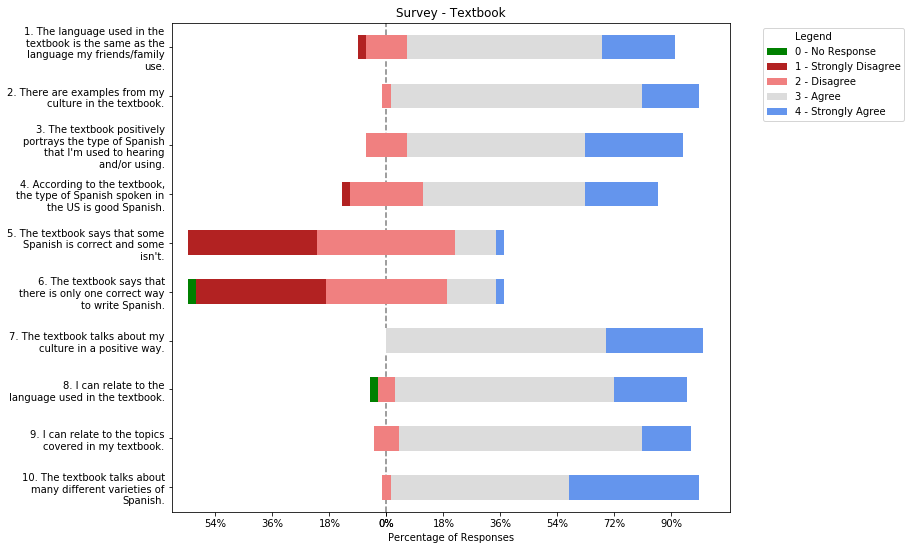

In [12]:
plot_likert.plot_counts(percentages, plot_likert.scales.scores4_0_custom, plot_percentage=True, colors=likert_colors, figsize=[10,9], title="Survey - Textbook")